In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec
import pandas as pd
from keras.applications.inception_v3 import InceptionV3
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.applications.inception_v3 import InceptionV3

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten,Conv2D,Dropout
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt


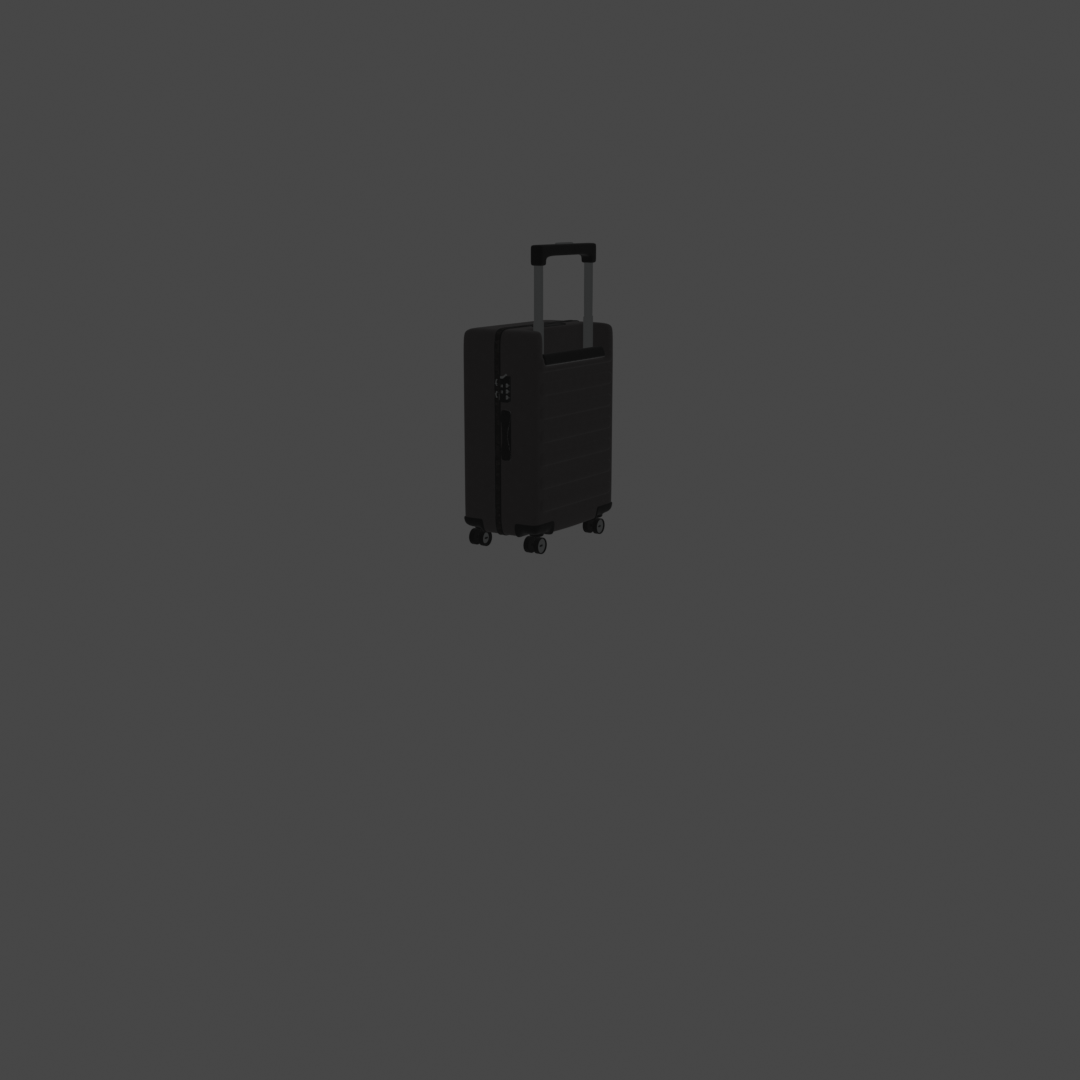

In [6]:
im=Image.open('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00000.png')
im

In [7]:
!apt-get install -y libsm6 libxext6 libxrender-dev
!pip install opencv-python

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libsm6 is already the newest version (2:1.2.2-1).
libxext6 is already the newest version (2:1.3.3-1).
libxrender-dev is already the newest version (1:0.9.10-1).
libxrender-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
!pip install tensorflow==2.6.0
!pip install keras~=2.6.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     | 564.4 MB 66.5 MB/s
     |████████████████████████████████| 132 kB 7.5 MB/s 
     |████████████████████████████████| 14.8 MB 18.3 MB/s 
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30694 sha256=7569d6e92ee0a2c176579be5db8e1142d01af1732d17eeddc343b5ffd8dd7fde
  Stored in directory: /root/.cache/pip/wheels/98/91/04/971b4c587cf47ae952b108949b46926f426c02832d120a082a
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68727 sha256=095a5205e4c688e7ddd030ee121235e3636cf8ed678c7bf1da9af5bfbc7d1a64
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built clang wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.2.0
    Uninstalling typing-extensions-4.2.0:
      Successfully uninstalled typing-extensions-4.2.0
  Attempting

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 27.2 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0


In [9]:
!pip install -U efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 6.4 MB/s 


In [10]:
from pathlib import Path
train_path = Path("/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train")
train_path.glob(r'**/*.png')

valid_path = Path("/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/val")
valid_path.glob(r'**/*.png')

<generator object Path.glob at 0x7f030000fdd0>

In [11]:
train_filepath = list(train_path.glob(r'**/*.png'))
valid_filepath = list(valid_path.glob(r'**/*.png'))

print(train_filepath)

[PosixPath('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00000.png'), PosixPath('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00001.png'), PosixPath('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00002.png'), PosixPath('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00016.png'), PosixPath('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00014.png'), PosixPath('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00009.png'), PosixPath('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00018.png'), PosixPath('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00010.png'), PosixPath('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dat

In [12]:
os.path.split(os.path.split(train_filepath[0])[1]) 
    
    

('', 'img00000.png')

In [13]:
len(list(map(lambda x: os.path.split(os.path.split(x)[0])[1],valid_filepath)))

133

In [14]:
len(list(map(lambda x: os.path.split(os.path.split(x)[0])[1],train_filepath)))

864

In [15]:
classes_train = []
classes_valid = []


In [16]:
csv_file = pd.read_csv('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train_data.csv')

for i in range(1000):
  cnt = 0
  for j in csv_file.file_name:
    cnt = cnt + 1
    num = int(j[3:8])

    if(i == num):
      cnt2 = 0
      for k in csv_file['class']:
        cnt2 = cnt2 + 1
        if(cnt2 == cnt):
          classes_train.append(k)
          cnt = 0
          cnt2 = 0
          break
      

  

In [17]:
csv_file = pd.read_csv('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/val_data.csv')

for i in range(1000):
  cnt = 0
  for j in csv_file.file_name:
    cnt = cnt + 1
    num = int(j[3:8])

    if(i == num):
      cnt2 = 0
      for k in csv_file['class']:
        cnt2 = cnt2 + 1
        if(cnt2 == cnt):
          classes_valid.append(k)
          cnt = 0
          cnt2 = 0
          break
      


In [18]:
print(classes_train)

['bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed'

In [19]:
print(classes_train[71])

bag


In [20]:
print(len(classes_train))

864


In [21]:
print(classes_valid)

['bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bag', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'bed', 'chair', 'chair', 'chair', 'chair', 'chair', 'chair', 'chair', 'chair', 'chair', 'chair', 'chair', 'coffeetable', 'coffeetable', 'coffeetable', 'coffeetable', 'coffeetable', 'coffeetable', 'coffeetable', 'coffeetable', 'coffeetable', 'coffeetable', 'coffeetable', 'cup', 'cup', 'cup', 'cup', 'cup', 'cup', 'cup', 'cup', 'cup', 'cup', 'cup', 'kitchentools', 'kitchentools', 'kitchentools', 'kitchentools', 'kitchentools', 'kitchentools', 'kitchentools', 'kitchentools', 'kitchentools', 'kitchentools', 'kitchentools', 'lamp', 'lamp', 'lamp', 'lamp', 'lamp', 'lamp', 'lamp', 'lamp', 'lamp', 'lamp', 'lamp', 'lamp', 'lamp', 'lamp', 'lamp', 'lamp', 'lamp', 'lamp', 'lamp', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'LivingSofa', 'LivingSofa', 'LivingSofa', 'LivingSofa', 'LivingSofa', 'LivingSofa', 'L

In [22]:
print(len(classes_valid))

133


여기까지 사진 파일 경로 / 라벨링 
이 다음부터는 모델 구축 시작

In [23]:
train_df = pd.concat([pd.Series(train_filepath).astype(str), pd.Series(classes_train)], axis=1)
train_df.columns = ['Images', 'Image_label']

valid_df = pd.concat([pd.Series(valid_filepath).astype(str), pd.Series(classes_valid)], axis=1)
valid_df.columns = ['Images', 'Image_label']


In [24]:
print(train_df)

                                                Images Image_label
0    /content/drive/MyDrive/2022_AI활용 표현과 ᄆ...         bag
1    /content/drive/MyDrive/2022_AI활용 표현과 ᄆ...         bag
2    /content/drive/MyDrive/2022_AI활용 표현과 ᄆ...         bag
3    /content/drive/MyDrive/2022_AI활용 표현과 ᄆ...         bag
4    /content/drive/MyDrive/2022_AI활용 표현과 ᄆ...         bag
..                                                 ...         ...
859  /content/drive/MyDrive/2022_AI활용 표현과 ᄆ...        shoe
860  /content/drive/MyDrive/2022_AI활용 표현과 ᄆ...        shoe
861  /content/drive/MyDrive/2022_AI활용 표현과 ᄆ...        shoe
862  /content/drive/MyDrive/2022_AI활용 표현과 ᄆ...        shoe
863  /content/drive/MyDrive/2022_AI활용 표현과 ᄆ...        shoe

[864 rows x 2 columns]


In [25]:
print(valid_df)

                                                Images Image_label
0    /content/drive/MyDrive/2022_AI활용 표현과 ᄆ...         bag
1    /content/drive/MyDrive/2022_AI활용 표현과 ᄆ...         bag
2    /content/drive/MyDrive/2022_AI활용 표현과 ᄆ...         bag
3    /content/drive/MyDrive/2022_AI활용 표현과 ᄆ...         bag
4    /content/drive/MyDrive/2022_AI활용 표현과 ᄆ...         bag
..                                                 ...         ...
128  /content/drive/MyDrive/2022_AI활용 표현과 ᄆ...        shoe
129  /content/drive/MyDrive/2022_AI활용 표현과 ᄆ...        shoe
130  /content/drive/MyDrive/2022_AI활용 표현과 ᄆ...        shoe
131  /content/drive/MyDrive/2022_AI활용 표현과 ᄆ...        shoe
132  /content/drive/MyDrive/2022_AI활용 표현과 ᄆ...        shoe

[133 rows x 2 columns]


In [26]:
train_df.shape

(864, 2)

In [27]:
valid_df.shape

(133, 2)

사진경로 라벨 묶어준거

In [28]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [29]:
train_gen = train_datagen.flow_from_dataframe(dataframe = train_df,
                                              x_col = 'Images', y_col ='Image_label',
                                              target_size = (200,200), batch_size = 512, 
                                              class_mode = 'categorical', shuffle = True)

val_gen = train_datagen.flow_from_dataframe(valid_df, 
                                            target_size=(200,200), x_col = 'Images', y_col ='Image_label', 
                                            class_mode='categorical',
                                            batch_size= 512, shuffle=True)
# test 도 있음        

Found 864 validated image filenames belonging to 11 classes.
Found 133 validated image filenames belonging to 11 classes.


In [30]:
train_gen.class_indices

{'LivingSofa': 0,
 'bag': 1,
 'bed': 2,
 'chair': 3,
 'coffeetable': 4,
 'cup': 5,
 'kitchentools': 6,
 'lamp': 7,
 'laptop': 8,
 'pot': 9,
 'shoe': 10}

In [31]:
# Creating the model

model=Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(3000,activation='relu'))
model.add(Dense(units=6,activation='softmax'))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 3000)              92259000  
                                                                 
 dense_1 (Dense)             (None, 6)                 18006     
                                                                 
Total params: 92,277,902
Trainable params: 92,277,902
Non-trainable params: 0
____________________________________________

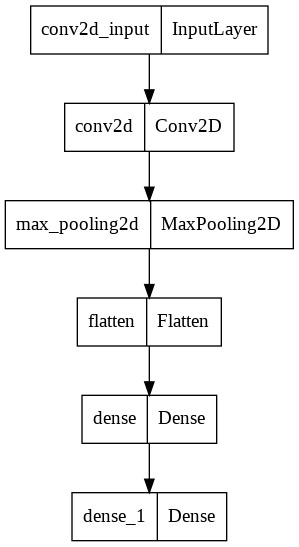

In [33]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False)

In [34]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [37]:
fitted_model = model.fit_generator(train_gen,
                        steps_per_epoch = 100,
                        epochs = 20,
                        validation_data = val_gen,
                        validation_steps = 100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/20


InvalidArgumentError: ignored

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)